In [1]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [79]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(version = "3.19")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Old packages: 'gert', 'MASS', 'Matrix', 'nlme', 'openssl', 'rmarkdown', 'xfun'



In [80]:
install.packages("locfit")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [82]:
if (!("DESeq2" %in% installed.packages())) {
  # Install DESeq2
  BiocManager::install("DESeq2", update = FALSE)
}

In [84]:
library("DESeq2")
library("tidyverse")

In [2]:
set.seed(12345)

In [50]:
di1 <- read.csv("iPSC 1.csv")
di2 <- read.csv("iPSC 2.csv")
di3 <- read.csv("iPSC 3.csv")
di4 <- read.csv("iPSC 4.csv")
d131 <- read.csv("MN D13-1.csv")
d132 <- read.csv("MN D13-2.csv")
d133 <- read.csv("MN D13-3.csv")
d134 <- read.csv("MN D13-4.csv")
d201 <- read.csv("MN D20-1.csv")
d202 <- read.csv("MN D20-2.csv")
d203 <- read.csv("MN D20-3.csv")
d204 <- read.csv("MN D20-4.csv")
d271 <- read.csv("MN D27-1.csv")
d272 <- read.csv("MN D27-2.csv")
d273 <- read.csv("MN D27-3.csv")
d274 <- read.csv("MN D27-4.csv")

In [51]:
glimpse(di1)

Rows: 63,225
Columns: 2
$ gene_short_name <chr> "OR4G4P", "FAM138A", "MIR1302-2HG", "MIR1302-2", "-", …
$ FPKM            <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…


In [52]:
di2_FPKM <- di2$FPKM
di3_FPKM <- di3$FPKM
di4_FPKM <- di4$FPKM
d131_FPKM <- d131$FPKM
d132_FPKM <- d132$FPKM
d133_FPKM <- d133$FPKM
d134_FPKM <- d134$FPKM
d201_FPKM <- d201$FPKM
d202_FPKM <- d202$FPKM
d203_FPKM <- d203$FPKM
d204_FPKM <- d204$FPKM
d271_FPKM <- d271$FPKM
d272_FPKM <- d272$FPKM
d273_FPKM <- d273$FPKM
d274_FPKM <- d274$FPKM
di1 <- cbind(di1, di2_FPKM, di3_FPKM, di4_FPKM, 
             d131_FPKM, d132_FPKM, d133_FPKM, d134_FPKM, 
             d201_FPKM, d202_FPKM, d203_FPKM, d204_FPKM, 
             d271_FPKM, d272_FPKM, d273_FPKM, d274_FPKM)

In [53]:
glimpse(di1)

Rows: 63,225
Columns: 17
$ gene_short_name <chr> "OR4G4P", "FAM138A", "MIR1302-2HG", "MIR1302-2", "-", …
$ FPKM            <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ di2_FPKM        <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ di3_FPKM        <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0522256,…
$ di4_FPKM        <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ d131_FPKM       <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.0171…
$ d132_FPKM       <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000,…
$ d133_FPKM       <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000,…
$ d134_FPKM       <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000,…
$ d201_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580,…
$ d202_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ d203_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827,…
$ d204_FPKM    

In [68]:
dc <- data.frame(di1["gene_short_name"], di1["FPKM"], di1["di2_FPKM"], di1["di3_FPKM"], di1["di4_FPKM"], 
                 di1["d131_FPKM"], di1["d132_FPKM"], di1["d133_FPKM"], di1["d134_FPKM"], 
                 di1["d201_FPKM"], di1["d202_FPKM"], di1["d203_FPKM"], di1["d204_FPKM"], 
                 di1["d271_FPKM"], di1["d272_FPKM"], di1["d273_FPKM"], di1["d274_FPKM"])
colnames(dc) <- c("Gene", "iPSC_1", "iPSC_2", "iPSC_3", "iPSC_4", "MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")
glimpse(dc)

Rows: 63,225
Columns: 17
$ Gene   <chr> "OR4G4P", "FAM138A", "MIR1302-2HG", "MIR1302-2", "-", "OR4G11P"…
$ iPSC_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ iPSC_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ iPSC_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0522256, 0.000000…
$ iPSC_4 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN13_1 <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.01718860, 0.0…
$ MN13_2 <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN13_3 <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000, 0.027586…
$ MN13_4 <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000, 0.289374…
$ MN20_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580, 0.000000…
$ MN20_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN20_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827, 0.063394…
$ MN20_4 <dbl> 

In [69]:
dc <- subset(dc, Gene != "-")
dc <- dc[!duplicated(dc[c("Gene")]), ]
glimpse(dc)

Rows: 41,023
Columns: 17
$ Gene   <chr> "OR4G4P", "FAM138A", "MIR1302-2HG", "MIR1302-2", "OR4G11P", "DD…
$ iPSC_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ iPSC_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ iPSC_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.163519…
$ iPSC_4 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN13_1 <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.00000000, 0.0…
$ MN13_2 <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000, 0.226456…
$ MN13_3 <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0275869, 0.194557…
$ MN13_4 <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.2893740, 0.000000…
$ MN20_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.038687…
$ MN20_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN20_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0633945, 0.000000…
$ MN20_4 <dbl> 

In [70]:
rownames(dc) <- NULL
pm <- dc %>% 
column_to_rownames("Gene") %>%
as.matrix() %>%
t()

In [71]:
sp <- prcomp(pm)
head(sp)

$sdev
 [1] 6.977483e+04 3.694105e+04 2.252129e+04 1.631063e+04 1.179333e+04
 [6] 9.622054e+03 8.328900e+03 7.641316e+03 7.313069e+03 6.648556e+03
[11] 6.089732e+03 5.136562e+03 3.619461e+03 2.161125e+03 1.927793e+03
[16] 6.477290e-11

$rotation
                                    PC1           PC2           PC3
OR4G4P                    -1.142604e-07 -2.721352e-07 -5.246968e-07
FAM138A                   -8.043389e-08  6.774184e-08 -3.768425e-07
MIR1302-2HG                2.409923e-07 -1.677661e-07 -4.324155e-07
MIR1302-2                 -6.566208e-08 -2.589568e-07 -4.325912e-07
OR4G11P                   -3.013163e-07 -1.142578e-06 -1.909404e-06
DDX11L2                    2.814526e-08  4.043386e-07 -3.276099e-07
DDX11L1                   -3.731503e-08 -1.419686e-07 -1.949800e-07
OR4F5                     -5.469539e-07 -6.887561e-07  1.863920e-06
WASH7P                     5.055903e-07 -8.369720e-07  5.469594e-07
MIR6859-1                 -2.112875e-06  8.697513e-06 -3.709774e-06
DDX11L17                  -1.399378e-07 -4.664275e-07 -5.385004e-07
WASH9P                    -3.507622e-08  1.212957e-06  4.992432e-07
MIR6859-2                 -4.932391e-18  2.336128e-17 -2.897673e-17
CICP27                    -1.228438e-07 -1.076277e-06  5.969336e-07
RNU6-1100P                -4.598383e-17  3.099795e-16 -2.681657e-16
RPL23AP24                 -6.145394e-07 -3.051185e-06 -1.044829e-06
CICP7                     -4.909117e-09 -1.535775e-08 -1.088072e-08
WBP1LP7                    0.000000e+00  0.000000e+00  0.000000e+00
OR4F29                     2.410611e-07  6.695128e-07  2.630434e-07
U6                         0.000000e+00  0.000000e+00  0.000000e+00
TUBB8P11                   8.678594e-07  1.857241e-06 -1.368042e-05
FAM41C                     1.425316e-06 -2.335276e-06 -6.585778e-06
KLHL17                    -1.024977e-06  8.355531e-07 -1.892028e-06
HES4                       4.191138e-06 -6.382643e-06 -7.243312e-06
ISG15                     -1.735563e-06  1.166493e-05 -2.158343e-05
LINC02593                  4.194037e-05  3.049284e-05 -3.302561e-05
RNF223                     1.734678e-07 -5.391501e-07 -8.638910e-07
LINC01342                  3.112209e-08 -4.055334e-06 -4.886985e-06
MIR200B                    0.000000e+00  0.000000e+00  0.000000e+00
MIR200A                    0.000000e+00  0.000000e+00  0.000000e+00
MIR429                     0.000000e+00  0.000000e+00  0.000000e+00
TTLL10-AS1                 5.130944e-07 -1.264049e-06 -1.763580e-06
TTLL10                     6.550773e-07 -3.949754e-06 -6.434941e-06
TNFRSF18                   8.847285e-07 -3.729987e-07 -1.036114e-06
TNFRSF4                    4.525050e-07 -1.399991e-06 -7.961440e-07
PLEKHN1                   -4.316613e-07 -1.790328e-06 -9.313451e-07
PERM1                      1.819318e-06 -1.012308e-06 -8.329818e-07
B3GALT6                    5.731157e-06  3.251846e-05  1.813150e-05
C1QTNF12                   2.847061e-07  3.922382e-06 -1.339672e-06
SAMD11                     7.056943e-06  4.564971e-05 -1.637232e-05
NOC2L                     -1.987025e-05 -3.668659e-06  2.544043e-04
LINC01786                  6.883405e-06  3.570418e-06 -1.422846e-05
SDF4                      -1.508738e-05  6.825633e-05  1.224890e-04
C1orf159                  -3.612979e-06  3.438887e-06 -1.690040e-05
CPTP                      -9.976738e-07 -1.866963e-05  6.651078e-05
SCNN1D                    -5.085362e-07  2.639904e-06 -2.283164e-05
MXRA8                     -3.939382e-06  2.409244e-05  1.342740e-05
UBE2J2                    -1.075758e-05  2.454045e-05 -9.525729e-05
NDUFB4P8                   5.637910e-05  2.896324e-05  4.022803e-05
AURKAIP1                  -3.647277e-05  2.788512e-05  1.913629e-04
TAS1R3                     1.165242e-05  1.299135e-05 -2.980935e-05
DVL1                      -1.870735e-05 -4.551125e-05  4.771858e-04
MIR6808                   -2.315809e-05  1.946365e-04  2.184236e-04
MRPL20-DT                 -1.075871e-06  6.976327e-07  1.547432e-05
ANKRD65        

In [72]:
pm[1:10, 1:2]

OR4G4P    FAM138A  
iPSC_1 0.0000000 0.0000000
iPSC_2 0.0000000 0.0000000
iPSC_3 0.0000000 0.0000000
iPSC_4 0.0000000 0.0000000
MN13_1 0.0000000 0.0000000
MN13_2 0.0529516 0.0520208
MN13_3 0.0336902 0.0000000
MN13_4 0.0000000 0.0000000
MN20_1 0.0000000 0.0000000
MN20_2 0.0000000 0.0000000

In [73]:
pc_eigenvalues <- sp$sdev^2

In [74]:
pc_eigenvalues <- tibble(PC = factor(1:length(pc_eigenvalues)), 
                         variance = pc_eigenvalues) %>% 
  # add a new column with the percent variance
  mutate(pct = variance/sum(variance)*100) %>% 
  # add another column with the cumulative variance explained
  mutate(pct_cum = cumsum(pct))

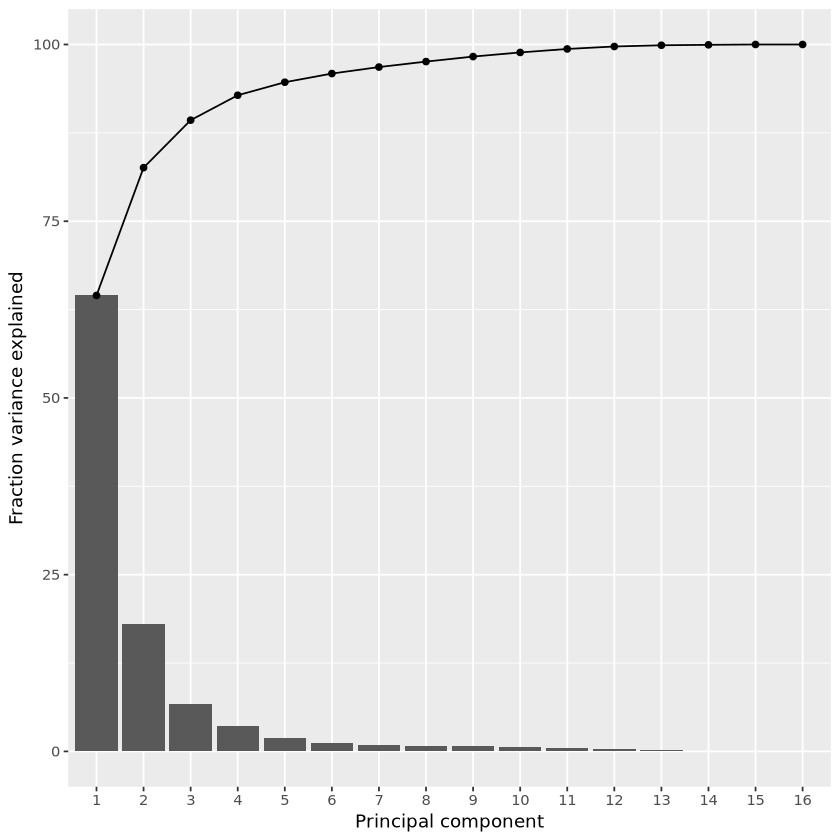

In [75]:
pc_eigenvalues %>% 
  ggplot(aes(x = PC)) +
  geom_col(aes(y = pct)) +
  geom_line(aes(y = pct_cum, group = 1)) + 
  geom_point(aes(y = pct_cum)) +
  labs(x = "Principal component", y = "Fraction variance explained")


In [76]:
pcs <- sp$x
pc_scores <- pcs %>% 
  # convert to a tibble retaining the sample names as a new column
  as_tibble(rownames = "sample")

# print the result
pc_scores

sample PC1       PC2       PC3        PC4         PC5        PC6       
1  iPSC_1 -23382.26  32197.01   3755.165   2424.8524  -1219.911  -6623.242
2  iPSC_2 -31873.72 -29909.36  66400.099   -511.2457 -11966.434   7776.893
3  iPSC_3 -22773.52  99573.46  19329.817 -19538.6016  22549.809   2689.046
4  iPSC_4 -28948.58 -24405.72  29634.432   3751.0603   2359.052  -5828.224
5  MN13_1 178487.94   6609.07   1380.538  -1782.5913  -2999.731  -2829.001
6  MN13_2 -26417.61 -25425.67   2010.455   5961.7906   3316.448  -7290.162
7  MN13_3 -25711.82 -22546.44  -5937.119   6872.9696   8866.538  -8665.335
8  MN13_4 -26027.35 -25181.51 -21856.660 -21074.8751   1734.081  -1207.518
9  MN20_1 178759.23 -11705.61   1224.114   1014.4298   3007.764   3040.902
10 MN20_2 -25057.13 -21030.63 -14906.263   9791.0372  12118.941 -10863.974
11 MN20_3 -25693.75 -23556.06  -5451.312   7275.9199   6290.520  -8655.107
12 MN20_4 -22019.32  40994.18 -12463.685   9156.4195 -19548.726  -4323.163
13 MN27_1 -23544.71  14176.65 -15549.340  13711.4957  -6909.049   6551.150
14 MN27_2 -28009.97 -32283.10 -17757.088 -46491.8482  -9620.396   6069.041
15 MN27_3 -25589.98 -19448.54 -16326.939  19300.5313  12982.886  28310.345
16 MN27_4 -22197.45  41942.28 -13486.214  10138.6555 -20961.793   1848.347
   PC7         PC8         PC9         PC10        PC11        PC12       
1  -19860.3991 -12109.8349   2017.4734 -7051.46989   8257.4726   5444.8092
2    2678.4231   5227.4967   5163.3404 -6756.38917   3621.2729  -2016.7462
3    5498.2007   3762.1866   -553.2900  1102.22973  -1269.8275   -598.1177
4   -5624.2859 -10677.4864 -11697.1376 14323.45362  -6879.1078  -2865.8507
5   -7196.6263   2578.7782  15718.3834  7283.87069  -4174.9838  -1945.1192
6    5722.2520   4998.4461   2751.8775   731.34727  -2902.9139   7808.3355
7    5095.1188   3831.1659   2330.8445  -157.85164   -962.9008   5789.2615
8   -1287.0611   -866.1300    293.3495 -1933.01609   1431.6819   1458.8978
9    7186.4640  -2558.9836 -15652.9873 -7182.87207   4131.0223   1892.6210
10   2438.0949  -1504.7232   2827.7879 -5520.29263   4409.7327 -14968.9104
11   3985.9048   2870.3467   2054.7350    17.41458   -532.1895   4113.4740
12  -3827.0658   5657.4753  -5623.1063 -9603.11661 -14274.6481  -2244.3903
13  -8204.0848  17192.6832  -7098.6216  9532.14740  10059.3011  -1114.5427
14   -856.4159   -430.6168   -786.1805  1189.87913   -657.5840  -1408.1294
15  -3053.1066  -5796.4875   3756.9783 -1814.29006  -5371.7065    459.5719
16  17304.5871 -12174.3162   4496.5533  5838.95576   5115.3784    194.8356
   PC13       PC14        PC15        PC16         
1    682.5657  -725.87295   739.26195 -7.028156e-11
2  -1104.0929   436.20099  -537.32801 -8.091661e-11
3    273.6016   218.64182    29.76965 -5.860912e-11
4   -291.0959   120.63293  -462.40033 -7.311485e-11
5   -313.5839   143.60577  -229.75985  5.278480e-10
6  10525.0117 -1584.85268  -493.00895 -9.516654e-11
7  -8465.6115 -4439.38806  -899.19648 -5.347545e-11
8   -901.1578  3630.69108 -5337.85075 -2.729124e-10
9    310.0774  -145.13610   226.57411  8.766596e-10
10  1985.5046  -927.44313   235.35126 -1.785294e-10
11 -2578.0839  5365.19374  4043.97114 -1.841087e-10
12  -600.4355   110.21998  -173.27132 -6.543388e-11
13   150.3439   -97.82932   -72.56490 -2.021778e-10
14   394.5243 -2037.83024  2912.63658 -2.041922e-10
15   171.3803  -109.83528   253.33915  2.533120e-10
16  -238.9480    43.00144  -235.52325 -1.189306e-10

In [88]:
x <- c("iPSC_1", "iPSC_2", "iPSC_3", "iPSC_4", "MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")
fac <- factor(substring(x, 1, 4))
print(fac)

 [1] iPSC iPSC iPSC iPSC MN13 MN13 MN13 MN13 MN20 MN20 MN20 MN20 MN27 MN27 MN27
[16] MN27
Levels: iPSC MN13 MN20 MN27


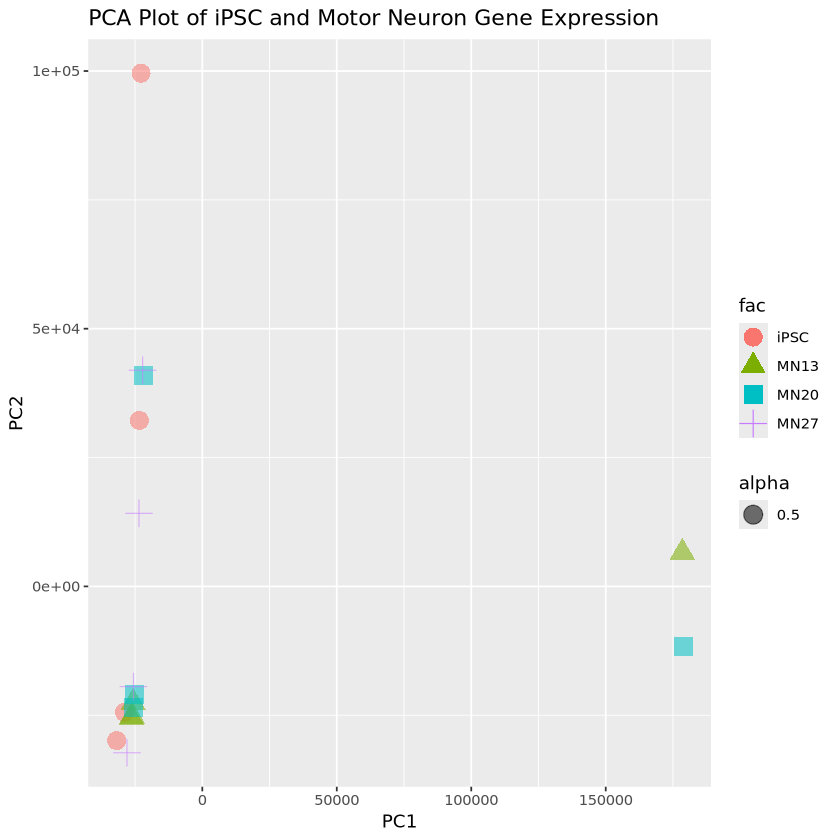

In [94]:
library(ggplot2)
pc_scores %>%
ggplot(aes(x = PC1, y = PC2, color = fac, shape = fac, alpha = 0.5)) + geom_point(size = 5.0) + ggtitle("PCA Plot of iPSC and Motor Neuron Gene Expression")
ggsave("PCA Plot of iPSC and Motor Neuron Gene Expression.png", height = 30, width = 20)

In [3]:
di1 <- read.csv("iPSC 1.csv")
di2 <- read.csv("iPSC 2.csv")
di3 <- read.csv("iPSC 3.csv")
di4 <- read.csv("iPSC 4.csv")
d131 <- read.csv("MN D13-1.csv")
d132 <- read.csv("MN D13-2.csv")
d133 <- read.csv("MN D13-3.csv")
d134 <- read.csv("MN D13-4.csv")
d201 <- read.csv("MN D20-1.csv")
d202 <- read.csv("MN D20-2.csv")
d203 <- read.csv("MN D20-3.csv")
d204 <- read.csv("MN D20-4.csv")
d271 <- read.csv("MN D27-1.csv")
d272 <- read.csv("MN D27-2.csv")
d273 <- read.csv("MN D27-3.csv")
d274 <- read.csv("MN D27-4.csv")

In [4]:
d132_FPKM <- d132$FPKM
d133_FPKM <- d133$FPKM
d134_FPKM <- d134$FPKM
d201_FPKM <- d201$FPKM
d202_FPKM <- d202$FPKM
d203_FPKM <- d203$FPKM
d204_FPKM <- d204$FPKM
d271_FPKM <- d271$FPKM
d272_FPKM <- d272$FPKM
d273_FPKM <- d273$FPKM
d274_FPKM <- d274$FPKM
d131 <- cbind(d131, d132_FPKM, d133_FPKM, d134_FPKM, 
             d201_FPKM, d202_FPKM, d203_FPKM, d204_FPKM, 
             d271_FPKM, d272_FPKM, d273_FPKM, d274_FPKM)
glimpse(d131)

Rows: 63,225
Columns: 13
$ gene_short_name <chr> "MIR1302-2HG", "MIR1302-2", "DDX11L2", "DDX11L1", "FAM…
$ FPKM            <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.0171…
$ d132_FPKM       <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000,…
$ d133_FPKM       <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000,…
$ d134_FPKM       <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000,…
$ d201_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580,…
$ d202_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ d203_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827,…
$ d204_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ d271_FPKM       <dbl> 0.0401068, 0.1911110, 0.0000000, 0.0000000, 0.0000000,…
$ d272_FPKM       <dbl> 0.0118849, 0.0000000, 0.0000000, 0.1276030, 0.0000000,…
$ d273_FPKM       <dbl> 0.18764800, 0.00000000, 0.00000000, 0.00000000, 0.0000…
$ d274_FPKM    

In [5]:
dc <- data.frame(d131["gene_short_name"], d131["FPKM"], d131["d132_FPKM"], d131["d133_FPKM"], d131["d134_FPKM"], 
                 d131["d201_FPKM"], d131["d202_FPKM"], d131["d203_FPKM"], d131["d204_FPKM"], 
                 d131["d271_FPKM"], d131["d272_FPKM"], d131["d273_FPKM"], d131["d274_FPKM"])
colnames(dc) <- c("Gene", "MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")
glimpse(dc)

Rows: 63,225
Columns: 13
$ Gene   <chr> "MIR1302-2HG", "MIR1302-2", "DDX11L2", "DDX11L1", "FAM138A", "O…
$ MN13_1 <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.01718860, 0.0…
$ MN13_2 <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN13_3 <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000, 0.027586…
$ MN13_4 <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000, 0.289374…
$ MN20_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580, 0.000000…
$ MN20_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN20_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827, 0.063394…
$ MN20_4 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_1 <dbl> 0.0401068, 0.1911110, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_2 <dbl> 0.0118849, 0.0000000, 0.0000000, 0.1276030, 0.0000000, 0.433228…
$ MN27_3 <dbl> 0.18764800, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.0…
$ MN27_4 <dbl> 

In [6]:
dc <- subset(dc, Gene != "-")
dc <- dc[!duplicated(dc[c("Gene")]), ]
glimpse(dc)

Rows: 41,023
Columns: 13
$ Gene   <chr> "MIR1302-2HG", "MIR1302-2", "DDX11L2", "DDX11L1", "FAM138A", "O…
$ MN13_1 <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.01718860, 0.0…
$ MN13_2 <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN13_3 <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000, 0.027586…
$ MN13_4 <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000, 0.289374…
$ MN20_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580, 0.000000…
$ MN20_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN20_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827, 0.063394…
$ MN20_4 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_1 <dbl> 0.0401068, 0.1911110, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_2 <dbl> 0.0118849, 0.0000000, 0.0000000, 0.1276030, 0.0000000, 0.433228…
$ MN27_3 <dbl> 0.1876480, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_4 <dbl> 

In [7]:
rownames(dc) <- NULL
pm <- dc %>% 
column_to_rownames("Gene") %>%
as.matrix() %>%
t()

In [8]:
sp <- prcomp(pm)
head(sp)

$sdev
 [1] 7.944162e+04 2.858230e+04 1.760278e+04 9.748862e+03 8.921268e+03
 [6] 7.635680e+03 7.474721e+03 7.092114e+03 5.011959e+03 3.202179e+03
[11] 2.487828e+03 7.123559e-11

$rotation
                                    PC1           PC2           PC3
MIR1302-2HG                1.629638e-07 -2.708634e-07  1.200109e-06
MIR1302-2                  1.143505e-07  4.409687e-07  3.506606e-07
DDX11L2                   -2.148719e-07 -3.419075e-07 -8.467504e-07
DDX11L1                    9.429132e-08 -6.136869e-07 -1.832541e-06
FAM138A                   -3.247193e-07 -2.153581e-07  3.119494e-07
OR4G4P                     4.334991e-07 -2.576082e-06 -6.511469e-06
WASH7P                     2.820817e-08 -9.295100e-08  2.241063e-06
MIR6859-1                  5.339468e-08 -3.080178e-07 -6.905159e-07
OR4G11P                   -5.492140e-07 -1.126522e-06  7.049275e-07
OR4F5                      2.531888e-06  2.923397e-05 -1.122734e-05
DDX11L17                   1.994109e-07 -7.817415e-07  1.568325e-07
WASH9P                    -8.665588e-08  2.865272e-06  7.289172e-08
MIR6859-2                  0.000000e+00  0.000000e+00  0.000000e+00
CICP27                     1.026757e-07 -1.345785e-06  3.213340e-06
RNU6-1100P                 0.000000e+00  0.000000e+00  0.000000e+00
RPL23AP24                  6.893715e-07 -4.171687e-06  3.711945e-06
CICP7                      7.005203e-09 -2.267690e-08  5.677625e-08
WBP1LP7                    0.000000e+00  0.000000e+00  0.000000e+00
OR4F29                    -2.722595e-07 -3.186698e-07 -2.490839e-07
U6                         0.000000e+00  0.000000e+00  0.000000e+00
KLHL17                    -4.366086e-06  2.425078e-06  7.223362e-06
LINC02593                  3.818484e-07  1.032242e-05 -6.423200e-06
TUBB8P11                  -5.646910e-06  1.910112e-06  4.205893e-06
FAM41C                    -3.170045e-06 -4.862392e-06  2.707294e-05
ISG15                      7.494516e-06  1.840264e-05  3.895110e-05
HES4                      -3.929035e-05  9.352743e-05 -5.256718e-05
RNF223                    -9.463566e-08 -8.938521e-07 -4.630786e-07
LINC01342                  5.028124e-07 -5.917733e-06  5.237139e-06
MIR200B                    0.000000e+00  0.000000e+00  0.000000e+00
MIR200A                    0.000000e+00  0.000000e+00  0.000000e+00
MIR429                     0.000000e+00  0.000000e+00  0.000000e+00
PLEKHN1                   -3.492030e-07 -2.968084e-06 -2.691166e-06
PERM1                     -8.085938e-09 -7.236454e-06  1.307035e-05
TNFRSF18                  -7.940021e-07 -1.466394e-06  7.992800e-07
TTLL10-AS1                -3.789030e-07 -3.336002e-06 -2.761792e-06
TTLL10                     6.514596e-07 -5.595224e-06  7.549352e-06
TNFRSF4                   -1.765749e-06 -2.442784e-06  2.583821e-07
B3GALT6                   -8.235492e-06  9.160868e-05  2.194931e-05
C1QTNF12                  -3.076221e-07  9.950624e-06 -2.300726e-06
SDF4                      -7.854674e-06  1.005584e-04  5.996170e-06
LINC01786                 -2.436810e-07 -9.102883e-06  1.105647e-05
C1orf159                  -6.301004e-06  3.838801e-05 -5.226844e-06
SCNN1D                     4.241679e-06 -1.049403e-05  3.314395e-05
CPTP                      -1.189251e-06  3.042002e-05 -2.223846e-05
SAMD11                    -6.899286e-06  3.778182e-05  5.051421e-05
NOC2L                      2.833853e-06  5.517544e-05  6.683365e-06
MXRA8                      8.740168e-07  4.683211e-05  3.732318e-05
UBE2J2                     1.624472e-05  9.427775e-05  5.148058e-05
AURKAIP1                  -5.805220e-05  7.462344e-05  7.202234e-06
NDUFB4P8                   2.361336e-06 -8.144916e-06  1.733407e-05
TAS1R3                    -9.320027e-06  4.896432e-05 -2.016036e-05
DVL1                      -7.064841e-06  1.313319e-04  3.419749e-05
MIR6808                    5.404741e-06  4.049374e-05  2.353066e-05
MRPL20-DT                 -3.470849e-07 -5.337954e-07  1.462052e-05
ANKRD65                    9.893916e-06  5.806823e-05  1.434041e-05
ANKR

In [9]:
pm[1:10, 1:2]

MIR1302-2HG MIR1302-2
MN13_1 0.0000000   0.0000000
MN13_2 0.0529516   0.0520208
MN13_3 0.0336902   0.0000000
MN13_4 0.0000000   0.0000000
MN20_1 0.0000000   0.0000000
MN20_2 0.0000000   0.0000000
MN20_3 0.0000000   0.0000000
MN20_4 0.0000000   0.0000000
MN27_1 0.0401068   0.1911110
MN27_2 0.0118849   0.0000000

In [10]:
pc_eigenvalues <- sp$sdev^2

In [11]:
pc_eigenvalues <- tibble(PC = factor(1:length(pc_eigenvalues)), 
                         variance = pc_eigenvalues) %>% 
  # add a new column with the percent variance
  mutate(pct = variance/sum(variance)*100) %>% 
  # add another column with the cumulative variance explained
  mutate(pct_cum = cumsum(pct))

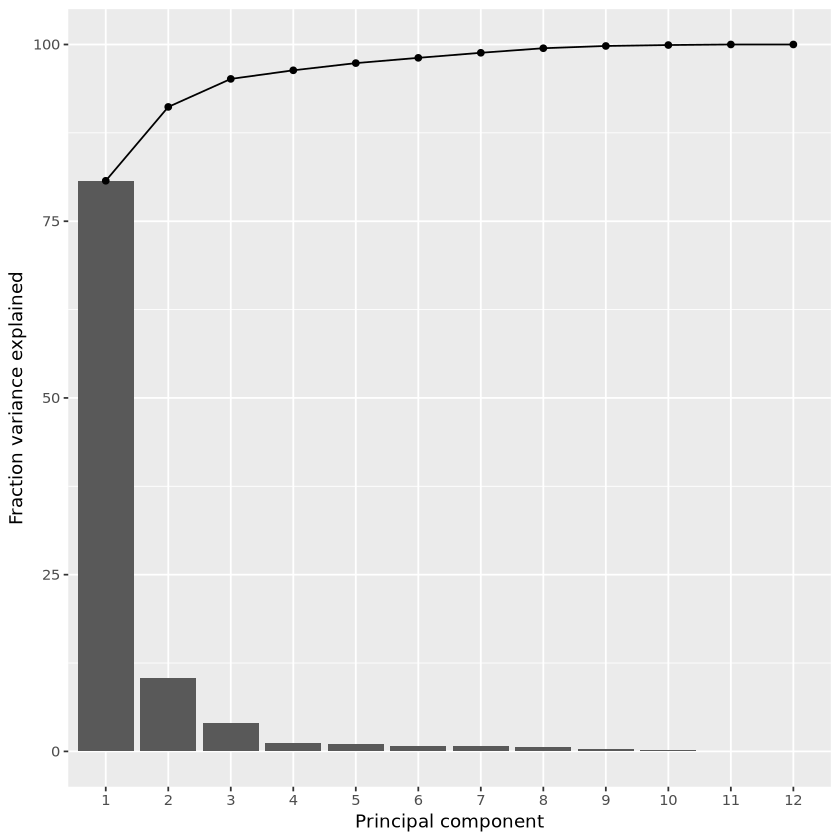

In [12]:
pc_eigenvalues %>% 
  ggplot(aes(x = PC)) +
  geom_col(aes(y = pct)) +
  geom_line(aes(y = pct_cum, group = 1)) + 
  geom_point(aes(y = pct_cum)) +
  labs(x = "Principal component", y = "Fraction variance explained")

In [13]:
pcs <- sp$x
pc_scores <- pcs %>% 
  # convert to a tibble retaining the sample names as a new column
  as_tibble(rownames = "sample")

# print the result
pc_scores

sample PC1        PC2        PC3        PC4         PC5         PC6       
1  MN13_1 -170591.70   6615.683  -3943.596   5930.5628   -622.7551  11556.785
2  MN13_2   35243.29 -16595.141  14099.385  15932.6396   7871.2766  -9801.192
3  MN13_3   34877.89 -14615.422  13879.145   6122.9831   1969.3516   1100.891
4  MN13_4   36135.55 -23699.808 -17116.749  -3340.4786  -2183.8051   3487.013
5  MN20_1 -169392.83 -10365.887   3605.471  -5980.7703    625.2646 -11577.283
6  MN20_2   34733.44 -13126.045  15486.903  -2390.9685  -1569.5062  15029.364
7  MN20_3   34808.91 -14821.697  13508.586   6807.7711   2221.2955    667.210
8  MN20_4   29606.14  51930.859  -8479.269   5806.7335  -5958.0218  -2194.196
9  MN27_1   31944.30  25252.469   2416.101   1253.8056 -20556.1912  -4044.688
10 MN27_2   38012.88 -34505.724 -42656.624   -670.4258    515.4788  -2056.079
11 MN27_3   34846.41  -8876.493  17513.580 -23393.4743   -694.3286  -3346.021
12 MN27_4   29775.72  52807.206  -8312.932  -6078.3782  18381.9409   1178.195
   PC7          PC8         PC9          PC10        PC11        PC12         
1   12098.93446   2036.5599    -18.27941   -26.37533    17.87718  5.417231e-10
2    6087.95853   1003.3064   8254.42310 -1663.04956   948.17306  6.206946e-11
3   -1202.04282   -500.9931 -10287.77364  1917.75224  4938.55314 -5.768896e-11
4   -2200.48614   -345.3431  -2064.12638 -8822.14478   230.04095 -2.719354e-10
5  -12052.28811  -2042.2651     36.06448    39.69534   -14.16750  1.752873e-10
6  -11374.92839  -1102.4263   7538.08304  1767.07413   467.43143 -1.834977e-10
7    -860.43170   -500.6964  -6131.96716   974.32130 -6520.08036 -7.391066e-11
8   -5800.64656  15737.1391   -214.90171    15.75175   -19.64617 -2.365752e-10
9    3923.04122 -12649.4594   1017.34847   421.56325    63.66559 -6.539835e-11
10   1402.96969    266.9020   1434.66401  4882.27949   -71.22667  2.265850e-10
11   9922.47072   7190.1889    677.93151   639.86156   -27.52162 -2.491696e-11
12     55.44908  -9092.9129   -241.46631  -146.72939   -13.09904 -9.160317e-11

In [14]:
x <- c("MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")
fac <- factor(substring(x, 1, 4))
print(fac)

 [1] MN13 MN13 MN13 MN13 MN20 MN20 MN20 MN20 MN27 MN27 MN27 MN27
Levels: MN13 MN20 MN27


Saving 6.67 x 6.67 in image


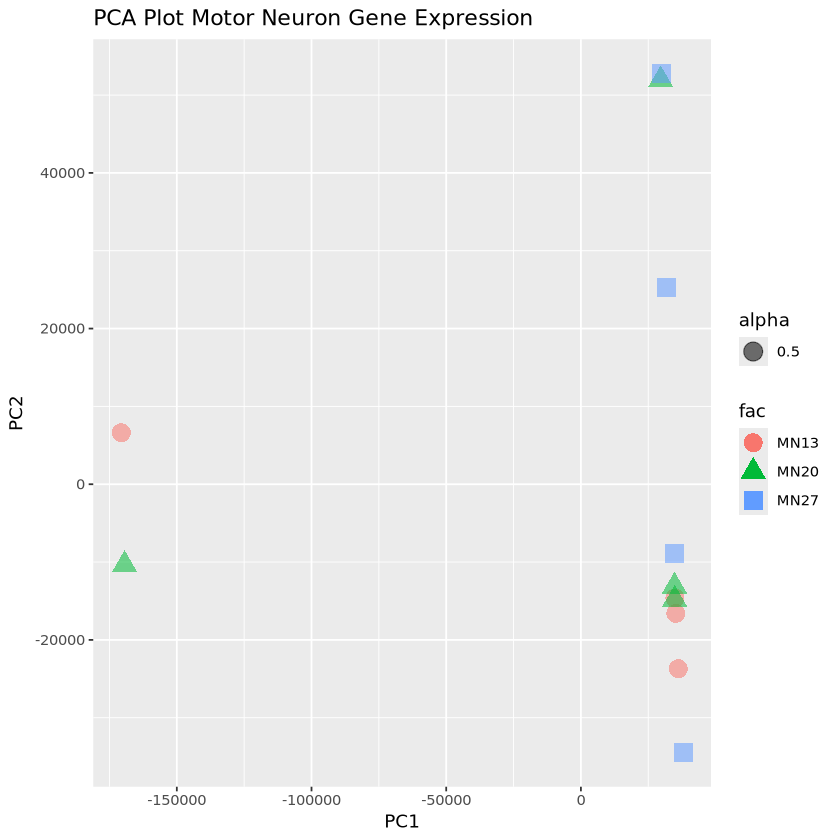

In [15]:
library(ggplot2)
pc_scores %>%
ggplot(aes(x = PC1, y = PC2, color = fac, shape = fac, alpha = 0.5)) + geom_point(size = 5.0) + ggtitle("PCA Plot Motor Neuron Gene Expression")
ggsave("PCA Plot of Motor Neuron Gene Expression.png")